# Facebook Metrics

## Data Preparations

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install ucimlrepo

In [2]:
# Load Dataset
from ucimlrepo import fetch_ucirepo

# Fetch dataset
facebook_metrics = fetch_ucirepo(id=368)

# Ambil Features dan Targets awal
X_raw = facebook_metrics.data.features
y_raw = facebook_metrics.data.targets

# Gabungkan kembali menjadi satu DataFrame (df)
df = pd.concat([X_raw, y_raw], axis=1)
print(f"Ukuran Data Awal: {df.shape}")
df.head()

Ukuran Data Awal: (500, 19)


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
# Cek Info Data
print("--- Info Dataset ---")
df.info()

print("\n--- Jumlah Missing Values ---")
print(df.isnull().sum()[df.isnull().sum() > 0])

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    

In [4]:
# Handling Missing Values
# Kolom 'Paid' (biner 0/1): Isi data kosong dengan modus
if df['Paid'].isnull().sum() > 0:
    mode_paid = df['Paid'].mode()[0]
    df['Paid'] = df['Paid'].fillna(mode_paid)
    print(f"-> Missing value di 'Paid' diisi dengan modus: {mode_paid}")

# Kolom 'like' & 'share': Karena jumlahnya sedikit, kita drop barisnya
initial_rows = df.shape[0]
df.dropna(subset=['like', 'share'], inplace=True)
final_rows = df.shape[0]

print(f"-> {initial_rows - final_rows} baris data kosong dihapus.")
print(f"Data Cleaning selesai. Sisa data: {final_rows} baris.")

-> Missing value di 'Paid' diisi dengan modus: 0.0
-> 4 baris data kosong dihapus.
Data Cleaning selesai. Sisa data: 496 baris.


/tmp/ipython-input-2139850174.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Total Interactions', data=df, estimator=np.mean, palette='viridis')


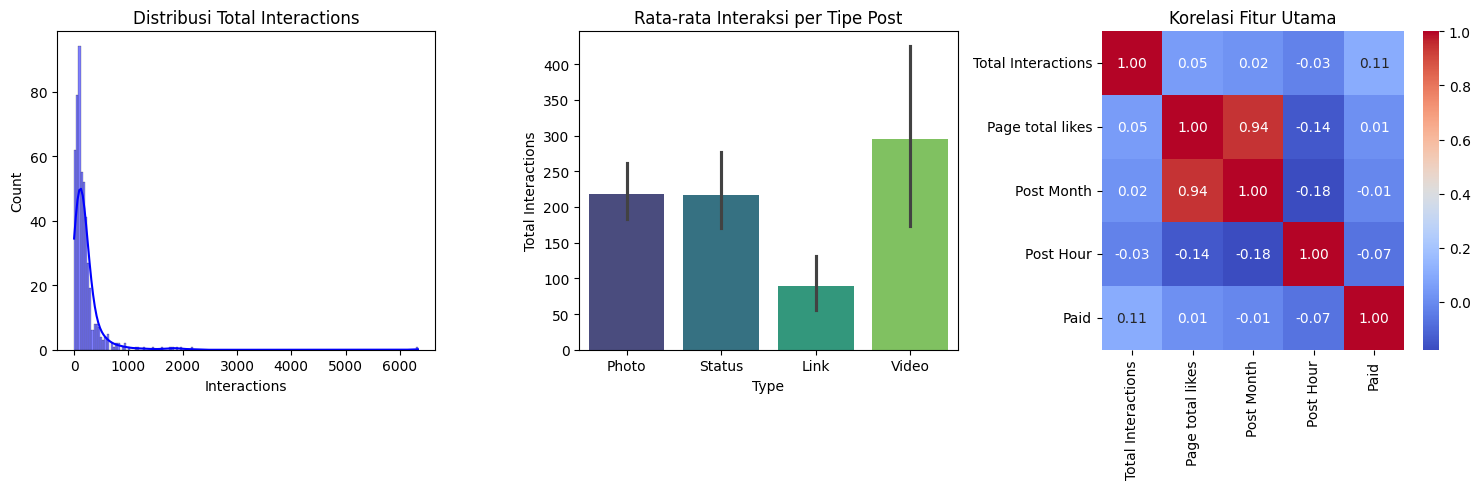

Insight EDA:
1. Distribusi target kemungkinan 'skewed' (banyak post interaksinya kecil, sedikit yang viral).
2. Kita bisa melihat tipe konten mana yang menarik interaksi tertinggi.


In [5]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Visualisasi 1: Distribusi Target (Total Interactions)
# Tujuannya: Melihat apakah data target normal atau skewed (miring)
plt.subplot(1, 3, 1)
sns.histplot(df['Total Interactions'], kde=True, color='blue')
plt.title('Distribusi Total Interactions')
plt.xlabel('Interactions')

# Visualisasi 2: Hubungan Type Postingan dengan Interaksi
# Tujuannya: Melihat jenis postingan apa yang paling populer (Photo/Video/Status?)
plt.subplot(1, 3, 2)
sns.barplot(x='Type', y='Total Interactions', data=df, estimator=np.mean, palette='viridis')
plt.title('Rata-rata Interaksi per Tipe Post')

# Visualisasi 3: Heatmap Korelasi (Hanya fitur numerik utama)
# Tujuannya: Melihat fitur apa yang paling berpengaruh
plt.subplot(1, 3, 3)
# Kita ambil beberapa kolom penting saja agar heatmap terbaca
cols_corr = ['Total Interactions', 'Page total likes', 'Post Month', 'Post Hour', 'Paid']
sns.heatmap(df[cols_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Fitur Utama')

plt.tight_layout()
plt.show()

print("Insight EDA:")
print("1. Distribusi target kemungkinan 'skewed' (banyak post interaksinya kecil, sedikit yang viral).")
print("2. Kita bisa melihat tipe konten mana yang menarik interaksi tertinggi.")

In [6]:
# Memisahkan Fitur (X) dan Target (y)
# Target prediksi adalah 'Total Interactions'

# Hapus komponen pembentuk target agar model tidak bocor (Data Leakage)
# Total Interactions = like + share + comment
features_drop = ['like', 'share', 'comment', 'Total Interactions']

X = df.drop(columns=features_drop) # Fitur
y = df['Total Interactions']       # Target

print("Fitur yang digunakan (X):")
print(X.columns.tolist())

Fitur yang digunakan (X):
['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post']


In [7]:
# One-Hot Encoding
# Mengubah kolom kategori 'Type' menjadi angka
X = pd.get_dummies(X, columns=['Type'], prefix='Type')

# Ubah nilai True/False menjadi 1/0 (agar standar)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

print("Encoding selesai. Preview data hasil encoding:")
X.head()

Encoding selesai. Preview data hasil encoding:


,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Type_Link,Type_Photo,Type_Status,Type_Video
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,0,1,0,0
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,0,0,1,0
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,1,0,0
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,0,1,0,0
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,0,1,0,0


In [8]:
# Splitting & Scaling

# Split Pertama: Pisahkan Test Set (15% dari total data)
# Sisa 85% akan jadi Train + Validation
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# Split Kedua: Pisahkan Validation Set dari sisa data tadi
# Karena data sisa tinggal 85%, maka rasionya: 0.15 / 0.85 ≈ 0.176
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.176, random_state=42
)

# Scaling (Fit pada Train, Transform pada Val & Test)
scaler = StandardScaler()

# Simpan nama kolom
cols = X_train.columns

# Fit scaler pada training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform pada validation dan test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Kembalikan ke DataFrame
X_train_final = pd.DataFrame(X_train_scaled, columns=cols)
X_val_final = pd.DataFrame(X_val_scaled, columns=cols)
X_test_final = pd.DataFrame(X_test_scaled, columns=cols)

print("Splitting 3 Bagian Selesai!")
print(f"-> Training Data   : {X_train_final.shape[0]} baris")
print(f"-> Validation Data : {X_val_final.shape[0]} baris")
print(f"-> Testing Data    : {X_test_final.shape[0]} baris")

Splitting 3 Bagian Selesai!
-> Training Data   : 346 baris
-> Validation Data : 75 baris
-> Testing Data    : 75 baris


In [9]:
# Simpan Data Clean
X_train_final.to_csv('X_train_processed.csv', index=False)
X_test_final.to_csv('X_test_processed.csv', index=False)
X_val_final.to_csv('X_val_processed.csv', index=False)
y_train.to_csv('y_train_processed.csv', index=False)
y_test.to_csv('y_test_processed.csv', index=False)
y_val.to_csv('y_val_processed.csv', index=False)

print("File csv bersih berhasil disimpan")

File csv bersih berhasil disimpan


## Model

In [10]:
# Load Data Clean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data yang sudah diproses dari file CSV
X_train = pd.read_csv('X_train_processed.csv')
X_test = pd.read_csv('X_test_processed.csv')
X_val = pd.read_csv('X_val_processed.csv')
y_train = pd.read_csv('y_train_processed.csv')
y_test = pd.read_csv('y_test_processed.csv')
y_val = pd.read_csv('y_val_processed.csv')
y_val = y_val.values.ravel()

# Pastikan y berupa array 1D (bukan DataFrame kolom tunggal) agar tidak warning
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print("Data clean berhasil dimuat!")
print(f"Shape Train: {X_train.shape}, Shape Test: {X_test.shape}")

Data clean berhasil dimuat!
Shape Train: (346, 18), Shape Test: (75, 18)


In [11]:
# Model 1 - Linear Regression (Baseline)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definisikan & Latih Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prediksi
y_pred_lr = model_lr.predict(X_test)

# Evaluasi
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("--- Hasil Model 1 (Linear Regression) ---")
print(f"MAE  : {mae_lr:.2f}")
print(f"RMSE : {rmse_lr:.2f}")
print(f"R2   : {r2_lr:.4f}")

--- Hasil Model 1 (Linear Regression) ---
MAE  : 35.38
RMSE : 59.97
R2   : 0.9370


In [12]:
# Model 2 - Random Forest (Advanced)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Definisikan Model Dasar
rf_base = RandomForestRegressor(random_state=42)

# Menentukan Kandidat Parameter yang mau diuji
param_dist = {
    'n_estimators': [50, 100, 200],     # Jumlah pohon
    'max_depth': [None, 10, 20],        # Kedalaman pohon
    'min_samples_split': [2, 5]         # Minimal sampel untuk membelah node
}

# Menjalankan Pencarian Otomatis (RandomizedSearch)
print("Sedang mencari hyperparameter terbaik untuk Random Forest...")
rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=5,          # Coba 5 kombinasi acak (agar tidak terlalu lama)
    cv=3,              # Cross Validation 3 kali
    verbose=1,
    random_state=42,
    n_jobs=-1          # Gunakan semua core CPU
)

rf_random.fit(X_train, y_train)

# Ambil model terbaik hasil pencarian
best_rf_model = rf_random.best_estimator_

print(f"Parameter Terbaik ditemukan: {rf_random.best_params_}")

# Prediksi & Evaluasi pakai Model Terbaik
y_pred_rf = best_rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Hasil Model 2 (Random Forest - Tuned) ---")
print(f"MAE  : {mae_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R2   : {r2_rf:.4f}")

Sedang mencari hyperparameter terbaik untuk Random Forest...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Parameter Terbaik ditemukan: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 10}

--- Hasil Model 2 (Random Forest - Tuned) ---
MAE  : 66.97
RMSE : 138.60
R2   : 0.6633


In [13]:
# Model 3 - Deep Learning (MLP)
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Arsitektur Model (Sama seperti sebelumnya)
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_final.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1) # Linear activation untuk regresi
])

model_dl.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 2. Training dengan Pencatatan Waktu (Timer)
print("Sedang melatih Neural Network...")

start_time = time.time() # Mulai stopwatch

history = model_dl.fit(
    X_train_final, y_train,
    validation_data=(X_val_final, y_val), # Menggunakan Validation Set
    epochs=50,
    batch_size=32,
    verbose=0
)

end_time = time.time() # Stop stopwatch
duration = end_time - start_time # Hitung selisih

print(f"Training Selesai! Waktu total: {duration:.2f} detik.")

# 3. Prediksi & Evaluasi
y_pred_dl = model_dl.predict(X_test_final).flatten()

mae_dl = mean_absolute_error(y_test, y_pred_dl)
rmse_dl = np.sqrt(mean_squared_error(y_test, y_pred_dl))
r2_dl = r2_score(y_test, y_pred_dl)

print("\n--- Hasil Model 3 (Deep Learning) ---")
print(f"Waktu Training : {duration:.2f} detik")
print(f"MAE  : {mae_dl:.2f}")
print(f"RMSE : {rmse_dl:.2f}")
print(f"R2   : {r2_dl:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sedang melatih Neural Network...
Training Selesai! Waktu total: 9.57 detik.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

--- Hasil Model 3 (Deep Learning) ---
Waktu Training : 9.57 detik
MAE  : 88.60
RMSE : 167.04
R2   : 0.5109


In [19]:
model_dl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,989 (39.02 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,660 (26.02 KB)

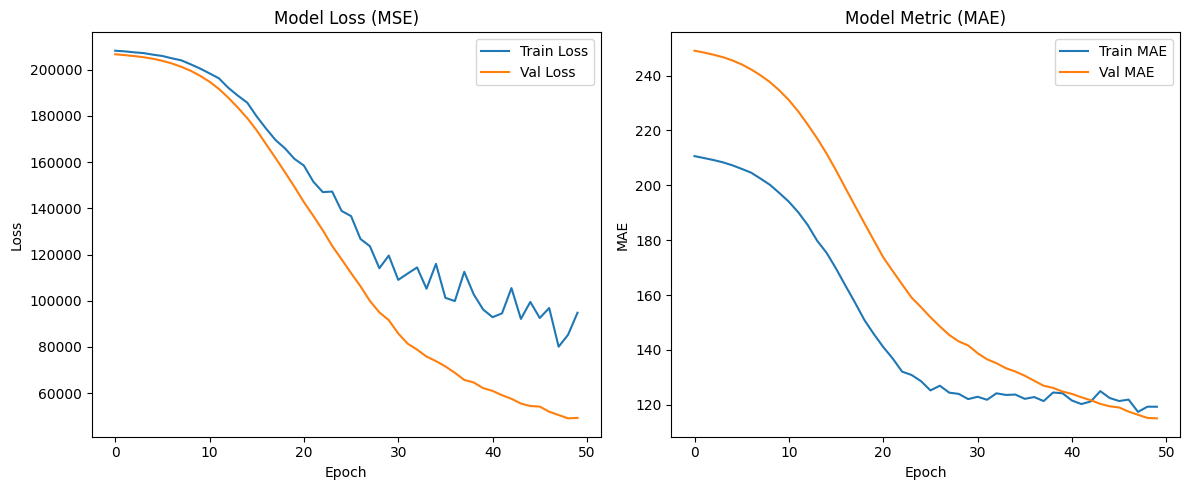

In [14]:
# Plot History Training
plt.figure(figsize=(12, 5))

# Plot Loss (MSE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Metric (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model Metric (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

--- Tabel Perbandingan Model ---
               Model        MAE        RMSE  R2 Score
0  Linear Regression  35.376171   59.971719  0.936954
1      Random Forest  66.973596  138.600319  0.663261
2      Deep Learning  88.600517  167.039286  0.510895


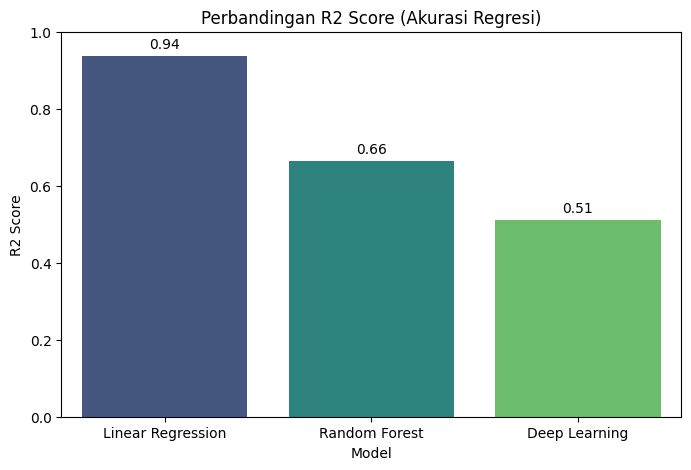

In [15]:
# Komparasi Model
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Deep Learning'],
    'MAE': [mae_lr, mae_rf, mae_dl],
    'RMSE': [rmse_lr, rmse_rf, rmse_dl],
    'R2 Score': [r2_lr, r2_rf, r2_dl]
})

print("--- Tabel Perbandingan Model ---")
print(results)

# Visualisasi Perbandingan R2 Score (Semakin tinggi semakin baik)
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R2 Score', data=results, hue='Model', palette='viridis')
plt.title('Perbandingan R2 Score (Akurasi Regresi)')
plt.ylim(0, 1) # Skala R2 biasanya 0-1
for index, row in results.iterrows():
    plt.text(index, row['R2 Score'] + 0.02, f"{row['R2 Score']:.2f}", ha='center')
plt.show()

In [16]:
# Simpan Model Terbaik
import joblib

# Simpan model terbaik
joblib.dump(model_lr, 'best_model_lr.pkl')

# Simpan Deep Learning
model_dl.save('model_dl.h5')

print("Model berhasil disimpan di folder models/")

Model berhasil disimpan di folder models/
